In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('fixed_values_ds.csv')
df.head()

,having_ip_address,length_of_url,shortening_services,having_at_symbol,double-slash_redirection,prefix and suffix,sub_domains,ssl_state,domain_registered,favicons,...,on_mouse_over,right_click,popup_windows,domain_age,dns_record,web_traffic,links_pointing,statistical_report,image_text_keyword,result
0,-1,-1,-1,-1,-1,-1,1,1,1,1,...,1,1,1,1,1,1,1,-1,-1,1
1,-1,0,-1,-1,-1,1,0,-1,1,1,...,-1,-1,-1,-1,1,1,-1,-1,1,1
2,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,-1,1,1,-1,-1,1,1
3,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,-1,1,0,-1,-1,1,1
4,-1,1,-1,-1,-1,1,1,-1,1,1,...,-1,-1,-1,1,1,-1,-1,-1,-1,1


In [7]:
def show_heatmap(corr_mtrx: pd.DataFrame) -> None:
    sns.heatmap(corr_mtrx)
    plt.show()

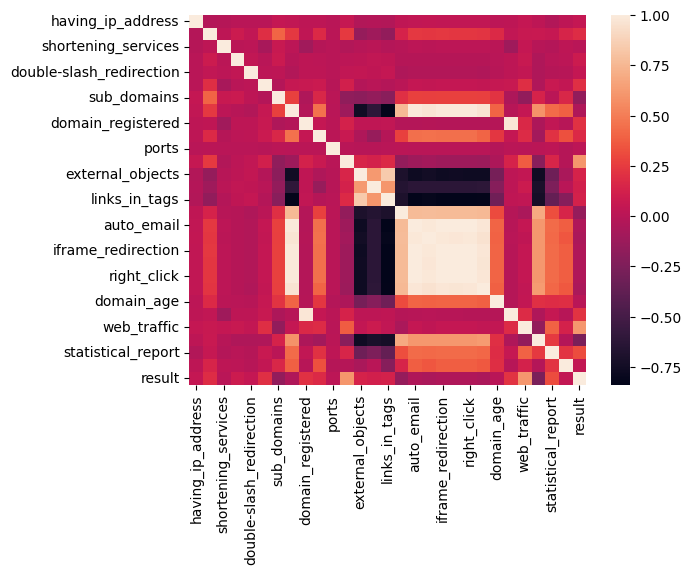

In [8]:
show_heatmap(df.corr())

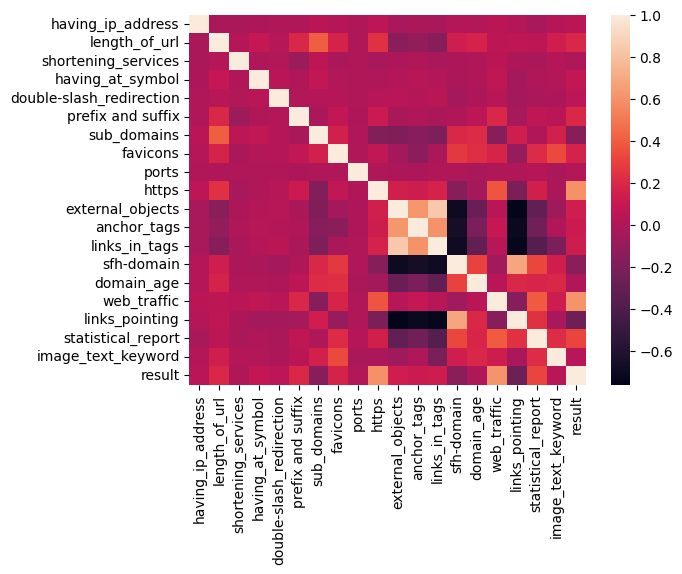

In [9]:
corr_matrix = df.corr()

np.fill_diagonal(corr_matrix.values, 0)

high_corr = np.where(np.abs(corr_matrix) > 0.9)
high_corr_pairs = [
    (corr_matrix.index[i], corr_matrix.columns[j])
    for i, j in zip(*high_corr) if i != j
]
columns_to_drop = set(col_2 for col_1, col_2 in high_corr_pairs)
df_dropped = df.drop(columns=columns_to_drop)

show_heatmap(df_dropped.corr())


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
y = df_dropped['result']
x = df_dropped.drop('result', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = model.score(X_test, y_test)
print(score)


0.9230223483504789
